# Introduction to Keras #

## https://keras.io/ ## 
(Keras has great documentation, in fact, most of the examples below are taken in part of in full from the docs!)

## Keras workflow for a sequential model -- MNIST toy example ##

A **Sequential** model class is a linear stack of layers. 
Each layer has it's own class. Some examples that you might encounter frequently are included in the import statements below 

In [34]:
#import the Sequential model class. 
from keras.models import Sequential 

#Core layers 
from keras.layers.core import Dense, Activation,Dropout,Flatten,Merge

#Convolution layers 
from keras.layers.convolutional import Convolution1D, Convolution2D 

#Pooling layers 
from keras.layers.pooling import MaxPooling1D, MaxPooling2D, AveragePooling1D, AveragePooling2D 

#Recurrent layers 
from keras.layers.recurrent import Recurrent, SimpleRNN, GRU, LSTM

#Embedding layers 
from keras.layers.embeddings import Embedding

#Normalization layers 
from keras.layers.normalization import BatchNormalization 


In [35]:
#the MNIST dataset is included with keras installation 
from keras.datasets import mnist 
(X_train,y_train),(X_test,y_test)=mnist.load_data() 

#we want to create a validation set to illustrate training with a validation dataset, so we "hack" this dataset by 
#splitting the test data into a test and validation dataset 
X_valid=X_test[0:X_test.shape[0]/2]
y_valid=y_test[0:y_test.shape[0]/2]
X_test=X_test[X_test.shape[0]/2::]
y_test=y_test[y_test.shape[0]/2::]


In [36]:
#Let's briefly examine our data  
print("Training X:"+str(X_train.shape))
print("Training y:"+str(y_train.shape))
print("Valid X:"+str(X_valid.shape))
print("Valid y:"+str(y_valid.shape))
print("Test X:"+str(X_test.shape))
print("Test y:"+str(y_test.shape))

Training X:(60000, 28, 28)
Training y:(60000,)
Valid X:(5000, 28, 28)
Valid y:(5000,)
Test X:(5000, 28, 28)
Test y:(5000,)


training label:5


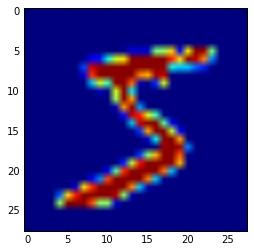

In [37]:
%matplotlib inline
from matplotlib.pyplot import imshow
#You can visualize the digits that we classify 
digit_index=0
imshow(X_train[digit_index])
print("training label:"+str(y_train[digit_index]))

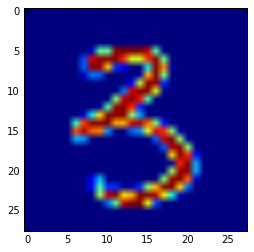

In [38]:
#plot our first test digit -- let's see if we can correctly predict it with the model 
imshow(X_test[digit_index])


In [39]:
#pre-process the input data 
from keras import backend as K 
from keras.utils import np_utils 
# input image dimensions                                                                                                                                                
img_rows, img_cols = 28, 28
#number of output classes
nb_classes=10 


#WARNING! order of dimensions differs for theano & tensorflow (that's why we check the backend and re-arrange the image 
#dimensions accordingly)

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
#this is done to normalize the data 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_test /= 255
X_valid /= 255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'test samples')


# convert class vectors to binary class matrices                                                                                                                        
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_valid = np_utils.to_categorical(y_valid, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(5000, 'test samples')
(5000, 'test samples')


#We want to implement the following model architecture to train a CNN to recognize handwritten digits: 
````    
Convolution2D --> ReLU --> Convolution2D --> ReLU --> MaxPool2D --> Dropout --> Flatten --> Dense --> ReLU
--> Dropout --> Dense --> Softmax
````

In [40]:
#architecture hyperparameters 
# number of convolutional filters to use                                                                                                                                
nb_filters = 32
# size of pooling area for max pooling                                                                                                                                  
pool_size = (2, 2)
# convolution kernel size                                                                                                                                               
kernel_size = (3, 3)

In [41]:
#model architecture 
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [44]:
#compile the model 

#we can try several different optimizers 
#optimizer="adam"
#optimizer="adadelta"
#optimizer="adagrad"
#optimizer="sgd"

#add momentum, alter learning rate: 
from keras.optimizers import SGD
optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
#from keras.utils import visualize_util
#visualize_util.plot(model,to_file="model.png")

In [45]:
#training
batch_size=128
nb_epoch=12
history=model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_valid, Y_valid),shuffle=True)


Train on 60000 samples, validate on 5000 samples
Epoch 1/12
60000/60000 [==============================] - 20s - loss: 0.5946 - acc: 0.8083 - val_loss: 0.2256 - val_acc: 0.9290
Epoch 2/12
60000/60000 [==============================] - 20s - loss: 0.2511 - acc: 0.9246 - val_loss: 0.1344 - val_acc: 0.9584
Epoch 3/12
60000/60000 [==============================] - 20s - loss: 0.1661 - acc: 0.9504 - val_loss: 0.0975 - val_acc: 0.9670
Epoch 4/12
60000/60000 [==============================] - 20s - loss: 0.1274 - acc: 0.9617 - val_loss: 0.0762 - val_acc: 0.9746
Epoch 5/12
60000/60000 [==============================] - 20s - loss: 0.1076 - acc: 0.9673 - val_loss: 0.0733 - val_acc: 0.9756
Epoch 6/12
60000/60000 [==============================] - 19s - loss: 0.0912 - acc: 0.9733 - val_loss: 0.0596 - val_acc: 0.9806
Epoch 7/12
60000/60000 [==============================] - 20s - loss: 0.0804 - acc: 0.9757 - val_loss: 0.0549 - val_acc: 0.9798
Epoch 8/12
60000/60000 [==============================]

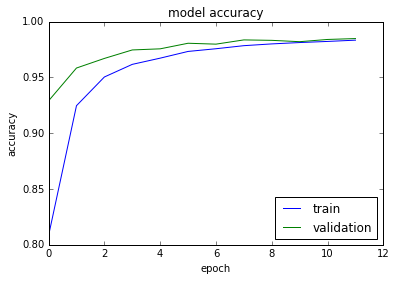

In [46]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


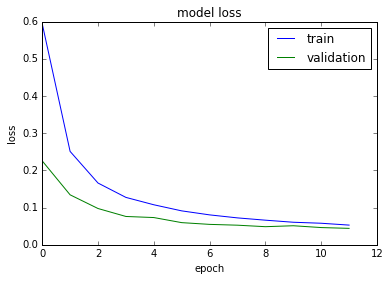

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [48]:
#training with fit generator 
import random 

#note: in a real "use case" x_matrix & y_matrix would likely be stored in an hdf5 file rather than loaded into memory. 
#check out http://www.h5py.org/
def create_generator(x_matrix,y_matrix,samples_to_yield): 
    num_entries=x_matrix.shape[0]
    while 1: 
        batch_index=random.randint(0,num_entries-samples_to_yield)
        x=x_matrix[batch_index:batch_index+samples_to_yield]
        y=y_matrix[batch_index:batch_index+samples_to_yield]
        yield x,y


#create the generator for training data 
train_generator=create_generator(X_train,Y_train,batch_size)
#create the generator for validation data 
valid_generator=create_generator(X_valid,Y_valid,batch_size)

samples_per_epoch=X_train.shape[0] 
nb_val_samples=X_valid.shape[0]

nb_epoch=2 #for illustrative purposes, we'll use 2 epochs to save time 
history=model.fit_generator(train_generator, samples_per_epoch, nb_epoch, verbose=1, 
                    callbacks=[], validation_data=valid_generator, nb_val_samples=nb_val_samples)


Epoch 1/2
60032/60000 [==============================] - 20s - loss: 0.0504 - acc: 0.9840 - val_loss: 0.0479 - val_acc: 0.9826
Epoch 2/2
60032/60000 [==============================] - 20s - loss: 0.0476 - acc: 0.9847 - val_loss: 0.0421 - val_acc: 0.9840


In [49]:
#evaluate 
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


#evaluate with generator (for large dataset)
evaluation_generator=create_generator(X_test,Y_test,batch_size)
nb_eval_samples=X_test.shape[0] 
score=model.evaluate_generator(evaluation_generator,nb_eval_samples)
print("With evaluate_generator:")
print('Test score:', score[0])
print('Test accuracy:', score[1])


('Test score:', 0.013779854466083635)
('Test accuracy:', 0.99480000000000002)
With evaluate_generator:
('Test score:', 0.0089764113782621283)
('Test accuracy:', 0.99589843749999996)


In [50]:
#predict classes
class_predictions=model.predict_classes(X_test) 

#predict probabilities 
class_probabilities=model.predict_proba(X_test)


4992/5000 [============================>.] - ETA: 0s

In [51]:
#let's look at the prediction for our test digit of interest 
print("predicted class:"+ str(class_predictions[digit_index]))
print("predicted probability:"+str([round(i,2) for i in class_probabilities[digit_index]]))

predicted class:3
predicted probability:[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Keras functional API ##
The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Use the functional API if you have: 

* multiple inputs & outputs 
* bypass layers
* merge layers 
* basically any non-linear connection between layers 


There are a few key points to remember for the functional API: 

* A layer instance is callable (on a tensor), and it returns a tensor
* Input tensor(s) and output tensor(s) can then be used to define a Model
* Such a model can be trained just like Keras Sequential models.
* All models are callable (just like layers). 

For example, let's look at a simple model that includes all layers required in the computation of output **b** given input **a**.

In [57]:
#The simplest possible example for the functional API 
from keras.models import Model
from keras.layers import Input, Dense

a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(input=a, output=b)


Useful attributes of Model

* `model.layers` is a flattened list of the layers comprising the model graph.
* `model.inputs` is the list of input tensors.
* `model.outputs` is the list of output tensors.

It's very straightforward to extend this model formulation to multi-input and multi-output models: 



In [58]:
#example: multiple inputs and multiple outputs with the functional API 
a1 = Input(shape=(32,))
a2 = Input(shape=(32,))

b1 = Dense(32)(a1)
b2 = Dense(32)(a2)

model = Model(input=[a1, a2], output=[b1, b2, b2])


In [59]:
#let's examine the attributes of the model 
model.layers

In [60]:
model.inputs

[input_8, input_9]

In [61]:
model.outputs

[Elemwise{add,no_inplace}.0,
 Elemwise{add,no_inplace}.0,
 Elemwise{add,no_inplace}.0]

## Example: Word embedding & training an LSTM with the functional API ## 
 
The functional API makes it easy to manipulate a large number of intertwined datastreams.

Let's consider the following model. We seek to predict how many retweets and likes a news headline will receive on Twitter. The main input to the model will be the headline itself, as a sequence of words, but to spice things up, our model will also have an auxiliary input, receiving extra data such as the time of day when the headline was posted, etc. The model will also be supervised via two loss functions. 

Here's what our model looks like:
![title](images/multi-input-multi-output-graph.png)

## Example: Training a CNN with the functional API (example from biology) ##

## Switching the keras backend (theano vs tensorflow) ## 

You can switch the backend by editing the file **~/.keras/keras.json**

## Getting fancy -- writing your own keras layers ##